In [1]:
from google.colab import files

uploaded = files.upload()

Saving Salary dataset.csv to Salary dataset.csv


In [2]:
import numpy as np
import matplotlib.pylab as plt

In [15]:
# Load the dataset using numpy
data = np.genfromtxt('Salary dataset.csv', delimiter=',', skip_header=1)
data

array([[0.00000e+00, 1.20000e+00, 3.93440e+04],
       [1.00000e+00, 1.40000e+00, 4.62060e+04],
       [2.00000e+00, 1.60000e+00, 3.77320e+04],
       [3.00000e+00, 2.10000e+00, 4.35260e+04],
       [4.00000e+00, 2.30000e+00, 3.98920e+04],
       [5.00000e+00, 3.00000e+00, 5.66430e+04],
       [6.00000e+00, 3.10000e+00, 6.01510e+04],
       [7.00000e+00, 3.30000e+00, 5.44460e+04],
       [8.00000e+00, 3.30000e+00, 6.44460e+04],
       [9.00000e+00, 3.80000e+00, 5.71900e+04],
       [1.00000e+01, 4.00000e+00, 6.32190e+04],
       [1.10000e+01, 4.10000e+00, 5.57950e+04],
       [1.20000e+01, 4.10000e+00, 5.69580e+04],
       [1.30000e+01, 4.20000e+00, 5.70820e+04],
       [1.40000e+01, 4.60000e+00, 6.11120e+04],
       [1.50000e+01, 5.00000e+00, 6.79390e+04],
       [1.60000e+01, 5.20000e+00, 6.60300e+04],
       [1.70000e+01, 5.40000e+00, 8.30890e+04],
       [1.80000e+01, 6.00000e+00, 8.13640e+04],
       [1.90000e+01, 6.10000e+00, 9.39410e+04],
       [2.00000e+01, 6.90000e+00, 9.1739

In [16]:
# Separate the columns into YearsExperience and Salary
x = data[:, 1]
y = data[:, 2]
x

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [17]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

1. solution: simple linear regression using formula for prediction

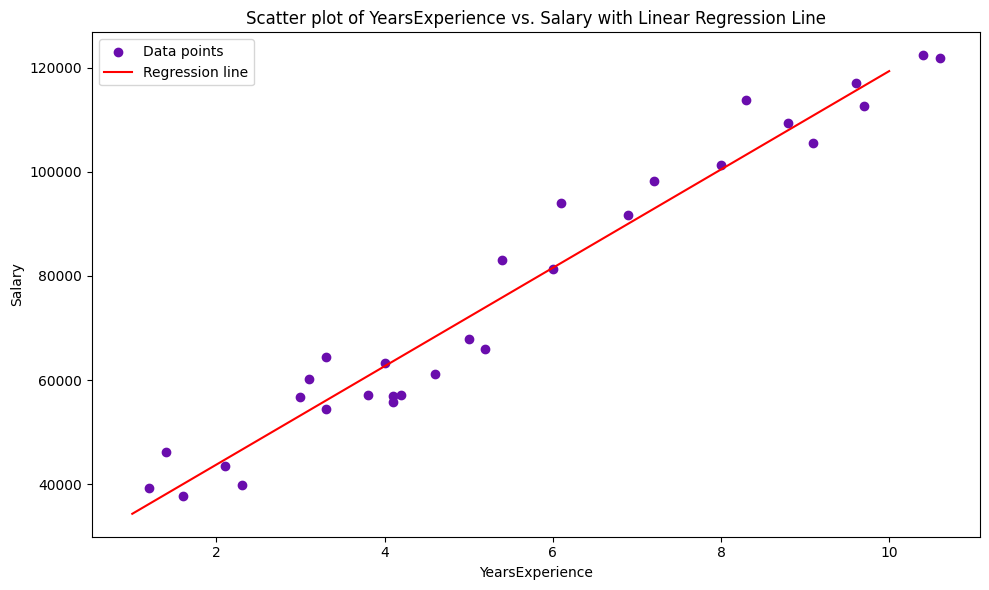

In [4]:
# Calculate the slope (m) and intercept (b) for the linear regression line
m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
b = (np.sum(y) - m *np.sum(x)) / len(x)

# Define the prediction function based on linear regression coefficients
def predict(x):
 return m*x + b

# Define the function to get the linear regression prediction
def getlinear(x, y):
    def inner(x1):
        return m * x1 + b
    m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x)*np.sum(x))
    b = (np.sum(y) - m * np.sum(x)) / len(x)
    return inner

predict = getlinear(x,y)

# Plot the scatter plot and linear regression line
vec = np.arange(int(min(x)), int(max(x)) + 1)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="#6A0DAD", label="Data points")
plt.plot(vec, predict(vec), color="red", label="Regression line")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter plot of YearsExperience vs. Salary with Linear Regression Line')
plt.legend()
plt.tight_layout()
plt.show()

2. solution: demonstration using iterations

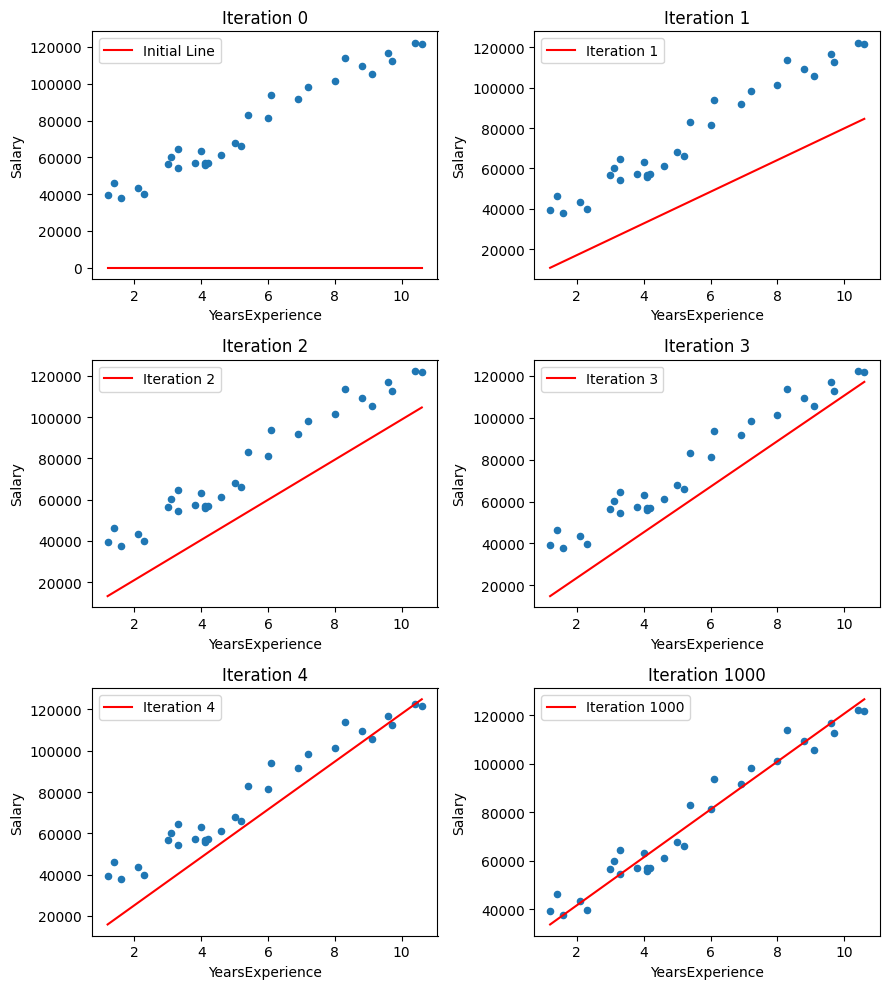

In [25]:
# Add a column of ones to x for the intercept term
X = np.vstack([np.ones(x.shape[0]), x]).T

# Initialize weights
theta = np.zeros(2)

# Learning rate
alpha = 0.01

# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))

    for i in range(num_iters):
        predictions = X @ theta
        theta = theta - (alpha/m) * (X.T @ (predictions - y))
        cost_history[i] = compute_cost(X, y, theta)
        theta_history[i, :] = theta.T

    return theta, cost_history, theta_history

# Perform gradient descent
iterations = [0, 1, 2, 3, 4, 1000]
max_iter = max(iterations)
theta, cost_history, theta_history = gradient_descent(X, y, theta, alpha, max_iter + 1)

# Plotting the scatter plot and linear regression lines at specific iterations
vec = np.linspace(min(x), max(x), 100)

# Create a 3x2 grid of plots
fig, axs = plt.subplots(3, 2, figsize=(9, 10))
axs = axs.ravel()

for i, num_iter in enumerate(iterations):
    current_theta = theta_history[num_iter]

    # Scatter plot
    axs[i].scatter(x, y, s=20, marker='o')

    # Initial line for iteration 0
    if num_iter == 0:
        initial_line = np.zeros_like(vec)
        axs[i].plot(vec, initial_line, color="red", label="Initial Line")
    else:
        # Linear regression line
        axs[i].plot(vec, current_theta[0] + current_theta[1] * vec, color="red", label=f"Iteration {num_iter}")

    # Set title and labels
    axs[i].set_title(f'Iteration {num_iter}')
    axs[i].set_xlabel('YearsExperience')
    axs[i].set_ylabel('Salary')
    axs[i].legend()

# Fix layout
plt.tight_layout()
plt.show()

3. solution: easier to understand

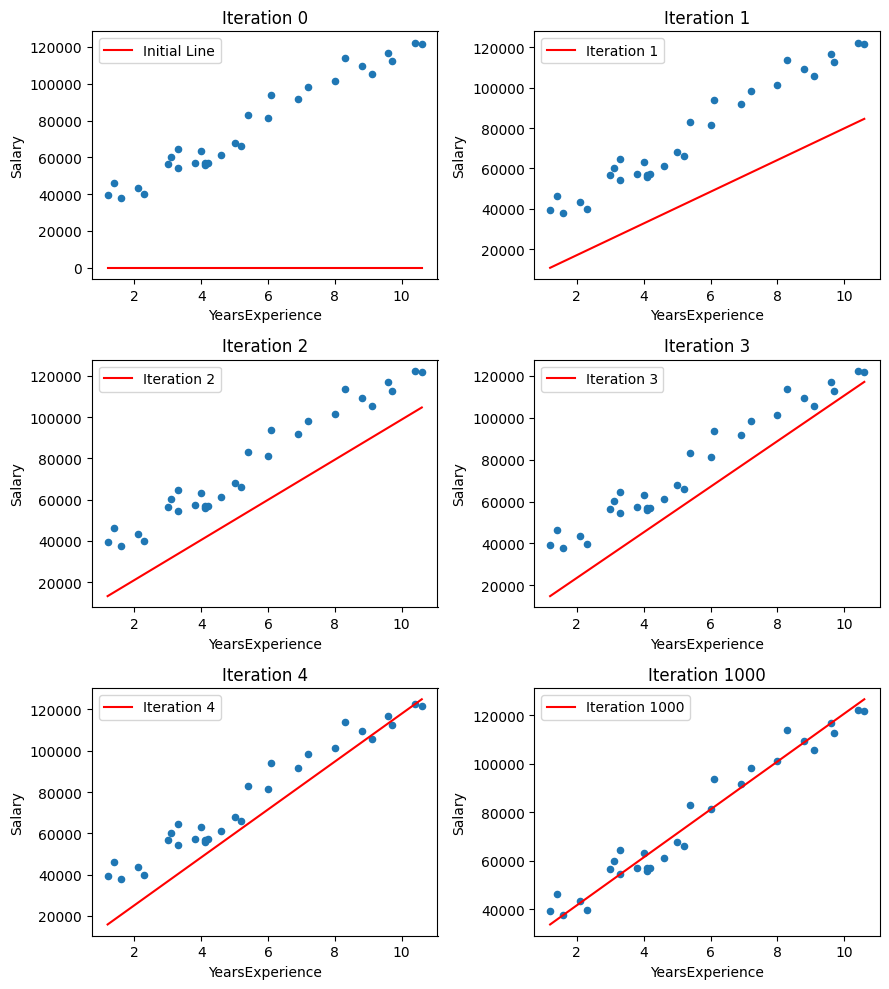

In [21]:
# Initialize parameters
theta = np.zeros(2)  # [theta0, theta1]
alpha = 0.001
iterations = [0, 1, 2, 3, 4, 1000]

# Function to compute cost
def compute_cost(x, y, theta):
    m = len(y)
    predictions = theta[0] + theta[1] * x
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient descent function with history tracking
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))

    for i in range(num_iters):
        predictions = theta[0] + theta[1] * x
        theta[0] -= (alpha / m) * np.sum(predictions - y)
        theta[1] -= (alpha / m) * np.sum((predictions - y) * x)

        cost_history[i] = compute_cost(x, y, theta)
        theta_history[i, :] = theta

    return theta, cost_history, theta_history

# Perform gradient descent
theta, cost_history, theta_history = gradient_descent(x, y, theta, alpha, 100)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(9, 10))
axs = axs.ravel()

for i, num_iter in enumerate(iterations):
    if num_iter <= max(iterations):
        if num_iter < len(theta_history):
            current_theta = theta_history[num_iter]

            axs[i].scatter(x, y, s=20, marker='o')

            if num_iter == 0:
                initial_line = np.zeros_like(x)
                axs[i].plot(x, initial_line, color="red", label="Initial Line")
            else:
                axs[i].plot(x, current_theta[0] + current_theta[1] * x, color="red", label=f"Iteration {num_iter}")

            axs[i].set_title(f'Iteration {num_iter}')
            axs[i].set_xlabel('YearsExperience')
            axs[i].set_ylabel('Salary')
            axs[i].legend()

plt.tight_layout()
plt.show()